Last edited by Claire Valva on April 22, 2018 UNFINISHED

# Hanning Window Examples

Will use the function scipy.signal.csd to apply Welch's Method to reduce noise in signal  by windowing different segments in the time series. Example temperature data is from Chicago
link: https://climexp.knmi.nl/data/vgdcnUSC00111497.dat

The four columns refer to year, month, date, average of minimum and maximum temperature.

In [18]:
import numpy as np
import scipy.signal
import pandas as pd
import datetime
from netCDF4 import Dataset, num2date # This is to read .nc files and time marray
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, fftfreq

In [30]:
#load data
data = np.loadtxt('/home/clairev/python-climate-data-processing/tutorials/data/vgdcnUSC00111497.txt', skiprows=18)
print(data.shape) # Shape of the data
data

(12940, 4)


array([[  1.98100000e+03,   1.20000000e+01,   1.00000000e+00,
          3.00000000e-01],
       [  1.98100000e+03,   1.20000000e+01,   2.00000000e+00,
          3.90000000e+00],
       [  1.98100000e+03,   1.20000000e+01,   3.00000000e+00,
         -1.70000000e+00],
       ..., 
       [  2.01800000e+03,   2.00000000e+00,   2.60000000e+01,
          3.05000000e+00],
       [  2.01800000e+03,   2.00000000e+00,   2.70000000e+01,
          7.25000000e+00],
       [  2.01800000e+03,   2.00000000e+00,   2.80000000e+01,
          1.08000000e+01]])

# Look at all years of data

In [97]:
#look at all years of the data
N = 365*30
temperature_last_year = data[-N:,-1]
init_year, init_month, init_day = data[-N,:3]
date_array = [datetime.date(int(init_year), int(init_month), int(init_day))
              + i*datetime.timedelta(days=1) for i in range(N)]

In [98]:
#see sizes and shapes of everything
print(temperature_last_year.shape)

(10950,)


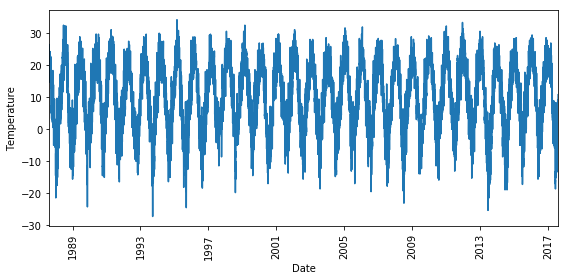

In [99]:
#look at time series data for all years
plt.figure(figsize=(8,4))
plt.plot(date_array,temperature_last_year)
plt.xlabel('Date')
plt.xlim((date_array[0],date_array[-1]))
plt.xticks(rotation=90)
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

# Look at one year of data

In [100]:
#subset data by the year
data_year_index = np.where(data[:,0] == 2000)

In [128]:
#look one year of the data
data_year = data[data_year_index]
N = data_year.shape[0]

#data_year #if you need to check on the data

In [129]:
temperature_year = data_year[-N:,-1]
init_year, init_month, init_day = data_year[-N,:3]
date_array_year = [datetime.date(int(init_year), int(init_month), int(init_day))
              + i*datetime.timedelta(days=1) for i in range(N)]

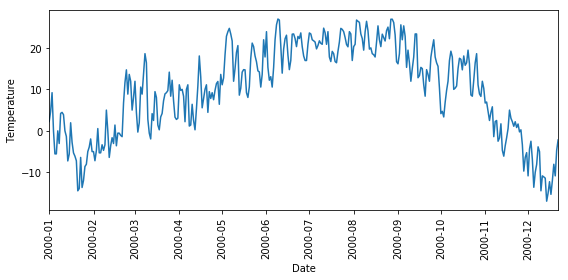

In [130]:
#look at time series data for a single year, sample year = 2000
plt.figure(figsize=(8,4))
plt.plot(date_array_year,temperature_year)
plt.xlabel('Date')
plt.xlim((date_array_year[0],date_array_year[-1]))
plt.xticks(rotation=90)
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

/home/clairev/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


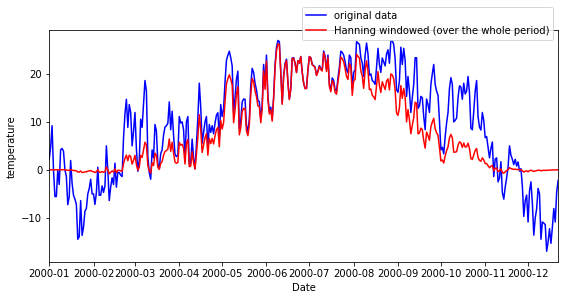

In [131]:
#get hanning window
w = scipy.signal.get_window('hann', N)

#apply the hanning window
year_fftw = 1/N * fft(temperature_year * w)
temperature_year_windowed = ifft((N*year_fftw))

#plot new data to compare
plt.figure(figsize=(8,4))
plt.plot(date_array_year,temperature_year,'b-',label='original data')
plt.plot(date_array_year,temperature_year_windowed,'r-',label='Hanning windowed (over the whole period)')
plt.xlim((date_array_year[0],date_array_year[-1]))
plt.xlabel('Date')
plt.ylabel('temperature')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102))
plt.tight_layout()
plt.show()

# Look at data for summer of that year

In [116]:
#subset data only for summer months (defining summer as June, July, August)
#there is perhaps a better way to do this, but this method works for now
summerindex_01 = np.where(data_year[:,1] > 5)
data_summer_01 = data_year[summerindex_01]
summerindex_02 = np.where(data_summer_01[:,1] < 9)
data_summer_02 = data_summer_01[summerindex_02]

In [117]:
#make variables for graph
N = data_summer_02.shape[0]

temperature_summer = data_summer_02[-N:,-1]
init_year, init_month, init_day = data_summer_02[-N,:3]
date_array_summer = [datetime.date(int(init_year), int(init_month), int(init_day))
              + i*datetime.timedelta(days=1) for i in range(N)]

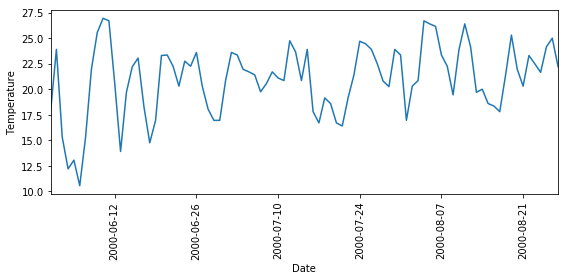

In [118]:
#look at time series data for a single year, sample year = 2000
plt.figure(figsize=(8,4))
plt.plot(date_array_summer,temperature_summer)
plt.xlabel('Date')
plt.xlim((date_array_summer[0],date_array_summer[-1]))
plt.xticks(rotation=90)
plt.ylabel('Temperature')
plt.tight_layout()
plt.show()

/home/clairev/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


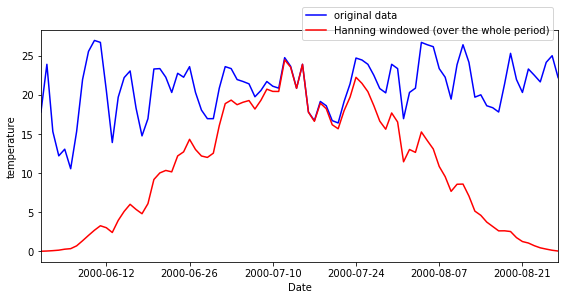

In [126]:
#get hanning window
w = scipy.signal.get_window('hann', N)

#apply the hanning window
summer_fftw = 1/N * fft(temperature_summer * w)
temperature_summer_windowed = ifft((N*summer_fftw))

#plot new data to compare
plt.figure(figsize=(8,4))
plt.plot(date_array_summer,temperature_summer,'b-',label='original data')
plt.plot(date_array_summer,temperature_summer_windowed,'r-',label='Hanning windowed (over the whole period)')
plt.xlim((date_array_summer[0],date_array_summer[-1]))
plt.xlabel('Date')
plt.ylabel('temperature')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102))
plt.tight_layout()
plt.show()

Hanning window for the summer months seems not completely useful, at least not over the entire period just as the data is changed so drastically. Hanning window on the entire year matches looks to match better with the data, but that is likely just a result of the average temperatures in the winter of chicago being cold. Will examine the fourier spectra when next looking as this as well.